# 1. Setup

In [1]:
import urllib.request
import ssl

from mobilkit.umni import *
from zipfile import ZipFile

ssl._create_default_https_context = ssl._create_unverified_context

# 2. Prepare data

## 2.1. Download data

- Download links taken from https://gaftp.epa.gov/EJSCREEN.
- The scale is to be block group. The data is then aggregated at the tract and county levels.

In [8]:
def get_epa_ejs(url, fname, root='../data/ejs',
                     overwrite=False):
    root = U.mkdir(root)
    zipped = root / f'{fname}.csv.zip'
    csv = root / f'{fname}.csv'
    if csv.exists() and not overwrite:
        return pd.read_csv(csv)
    urllib.request.urlretrieve(url, zipped)
    fname = url.split('/')[-1].replace('.zip', '')
    with ZipFile(zipped, 'r') as f:
        f.extract(fname, path=root)
    (root / fname).rename(csv)
    zipped.unlink()
    return pd.read_csv(csv)

url20 = 'https://gaftp.epa.gov/EJScreen/2020/EJSCREEN_2020_StatePctile.csv.zip'
# url23 = 'https://gaftp.epa.gov/EJScreen/2023/2.22_September_UseMe/EJSCREEN_2023_BG_StatePct_with_AS_CNMI_GU_VI.csv.zip'
ejs = get_epa_ejs(url20, 'bg2020').disp() # t=0:12

220,333 rows x 124 cols; Memory: 624.4 MiB


,OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,D_PM25_2,B_PM25_D2,P_PM25_D2,D_OZONE_2,B_OZONE_D2,P_OZONE_D2,D_DSLPM_2,B_DSLPM_D2,P_DSLPM_D2,D_CANCR_2,B_CANCR_D2,P_CANCR_D2,D_RESP_2,B_RESP_D2,P_RESP_D2,D_PTRAF_2,B_PTRAF_D2,P_PTRAF_D2,D_LDPNT_2,B_LDPNT_D2,P_LDPNT_D2,D_PNPL_2,B_PNPL_D2,P_PNPL_D2,D_PRMP_2,B_PRMP_D2,P_PRMP_D2,D_PTSDF_2,B_PTSDF_D2,P_PTSDF_D2,D_PWDIS_2,B_PWDIS_D2,P_PWDIS_D2,PM25,B_PM25,P_PM25,OZONE,B_OZONE,P_OZONE,DSLPM,B_DSLPM,P_DSLPM,CANCER,B_CANCR,...,P_VULEOPCT,MINORPCT,B_MINORPCT,P_MINORPCT,LOWINCPCT,B_LWINCPCT,P_LWINCPCT,LINGISOPCT,B_LNGISPCT,P_LNGISPCT,LESSHSPCT,B_LESHSPCT,P_LESHSPCT,UNDER5PCT,B_UNDR5PCT,P_UNDR5PCT,OVER64PCT,B_OVR64PCT,P_OVR64PCT,T_MINORPCT,T_LWINCPCT,T_LNGISPCT,T_LESHSPCT,T_UNDR5PCT,T_OVR64PCT,T_VULEOPCT,T_PM25,T_PM25_D2,T_OZONE,T_OZONE_D2,T_DSLPM,T_DSLPM_D2,T_CANCR,T_CANCR_D2,T_RESP,T_RESP_D2,T_PTRAF,T_PTRAF_D2,T_LDPNT,T_LDPNT_D2,T_PNPL,T_PNPL_D2,T_PRMP,T_PRMP_D2,T_PTSDF,T_PTSDF_D2,T_PWDIS,T_PWDIS_D2,Shape_Length,Shape_Area
,<int64>,<int64>,<object>,<object>,<int64>,<int64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,...,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<float64>,<int64>,<float64>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<object>,<float64>,<float64>
0,1,10010201001,Alabama,AL,4,636,-492.025529,6,52.0,-1866.38637,6,52.0,-14.148258,6,51.0,-2506.966483,6,51.0,-40.010896,6,51.0,-4621.051601,4,35.0,-13.815487,4,31.0,-3.601838,5,40.0,-4.325802,6,53.0,-29.790608,4,38.0,NaN,0,NaN,9.690899,7,69.0,36.760212,3,24.0,0.278663,5,47.0,49.377032,9,...,43.0,0.163522,4,35.0,0.38522,6,52.0,0.047619,10,92.0,0.208134,8,75.0,0.031447,3,23.0,0.150943,5,46.0,16% (35%ile),39% (52%ile),5% (92%ile),21% (75%ile),3% (23%ile),15% (46%ile),27% (43%ile),9.69 ug/m3 (69%ile),52%ile,36.8 ppb (24%ile),52%ile,0.279 ug/m3 (47%ile),51%ile,49 lifetime risk per million (84%ile),51%ile,0.79 (89%ile),51%ile,91 daily vehicles/meters distance (55%ile),35%ile,0.27 = fraction pre-1960 (79%ile),31%ile,0.071 facilities/km distance (79%ile),40%ile,0.085 facilities/km distance (23%ile),53%ile,0.59 facilities/km distance (57%ile),38%ile,NaN,NaN,13443.155206,6040789.687256


## 2.2. Clean data

### 2.2.1. Columns

In [12]:
# %%bash
# dir=../data/ejs; mkdir $dir; cd $dir
# fname=2020_EJSCREEEN_columns-explained.xlsx
# wget --no-check-certificate https://gaftp.epa.gov/EJScreen/2020/$fname
# mv $fname columns2020.xlsx

The downloaded columns Excel file was manually labeled by category of interest and moved to `../data/ejs/ejs_columns2020.xlsx`.

In [13]:
cols = (pd.read_excel('../data/ejs/ejs_columns2020.xlsx')
        .rename(columns=lambda x: x.lower().replace(' ', '_'))).disp(5)

142 rows x 7 cols; Memory: 0.0 MiB


,num,group,code,include,category,label,description
,<int64>,<object>,<object>,<bool>,<object>,<object>,<object>
0,1,Geometry,OBJECTID,False,NaN,NaN,Unique ID for block group in geodatabase
1,2,Geometry,Shape,False,NaN,NaN,Coordinates defining the features
2,3,Geometry,ID,True,NaN,NaN,Census FIPS code for block group
3,4,Base SES,ACSTOTPOP,True,NaN,NaN,Total population
4,5,Base SES,ACSIPOVBAS,True,NaN,NaN,Population for whom poverty status is determined


### 2.2.2. Clean

In [18]:
def clean_ejs_data(data, cols=cols, state='IN',
                   save=True, overwrite=False):
    outfile = Path('../data/ejs/ejs.parquet')
    if outfile.exists() and not overwrite:
        return pd.read_parquet(outfile)
    df = data.query(f'ST_ABBREV == "{state}"')
    df = df.rename(columns={'ID': 'geoid'}).set_index('geoid')
    cols = cols.query('group == "Base EJ"')[
        ['code', 'category', 'label', 'description']]
    bg = df[cols['code'].tolist()].reset_index().astype({'geoid': str})
    res = []
    for scale, nchar in [('BG', 12), ('TRACT', 11), ('COUNTY', 5)]:
        df = bg.assign(geoid=bg.geoid.str[:nchar])
        df = df.groupby('geoid').sum().reset_index()
        res.append(df.assign(scale=scale))
    df = pd.concat(res).reset_index(drop=True)
    df = df.melt(['geoid', 'scale'])
    df = df.merge(cols, left_on='variable', right_on='code')
    df = df[['geoid', 'scale', 'category', 'label', 'description', 'value']]
    df = df.rename(columns={'label': 'indicator'})
    df = df.astype({x: CAT for x in [
        'geoid', 'scale', 'category', 'indicator', 'description']})
    if save:
        df.to_parquet(U.mkfile(outfile))
    return df

ejs2 = clean_ejs_data(ejs, overwrite=1).disp()

64,170 rows x 6 cols; Memory: 1.5 MiB


,geoid,scale,category,indicator,description,value
,<category>,<category>,<category>,<category>,<category>,<float64>
0,180010301001,BG,Transportation,Diesel PM,Diesel particulate matter level in air,0.24585


# 3. Visualize

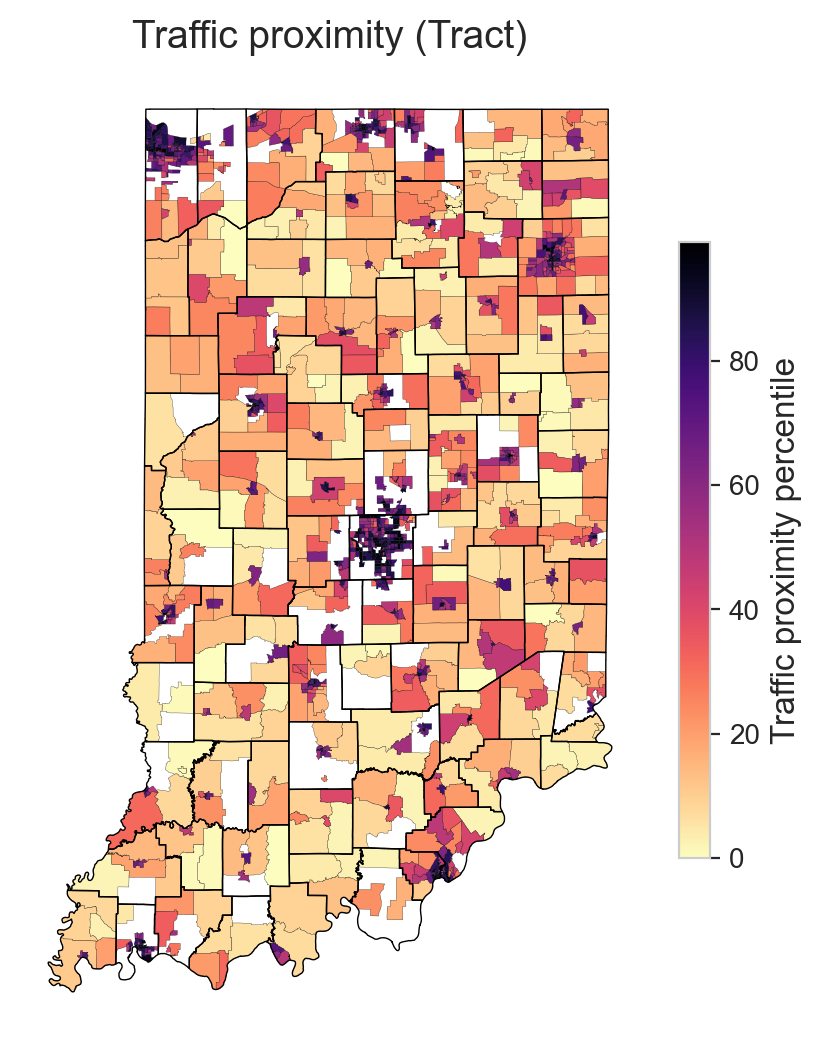

In [ ]:
def plot_ejs_map(var, scale, ejs=ejs, cmap='magma_r', size=(5, 10), dpi=120):
    ejs = ejs.query(f'scale=="{scale}" & variable=="{var}" & is_pctile')
    counties = gpd.read_parquet('../data/zones/county2010.parquet')
    zones = gpd.read_parquet(f'../zones/{scale.lower()}.parquet')
    ejs = zones[['geoid', 'geometry']].merge(ejs, on='geoid')
    ax = U.plot(size=size, dpi=dpi, axoff=1, title=f'{var} ({scale})')
    ejs.plot(ax=ax, column='value', cmap=cmap,
             edgecolor='k', lw=0.1, legend=True,
             legend_kwds=dict(shrink=0.4, label=var + ' percentile'))
    counties.plot(ax=ax, facecolor='none', edgecolor='k', lw=0.5)

plot_ejs_map('Traffic proximity', 'Tract', dpi=200) # t=0:07

## 3.1. Correlation

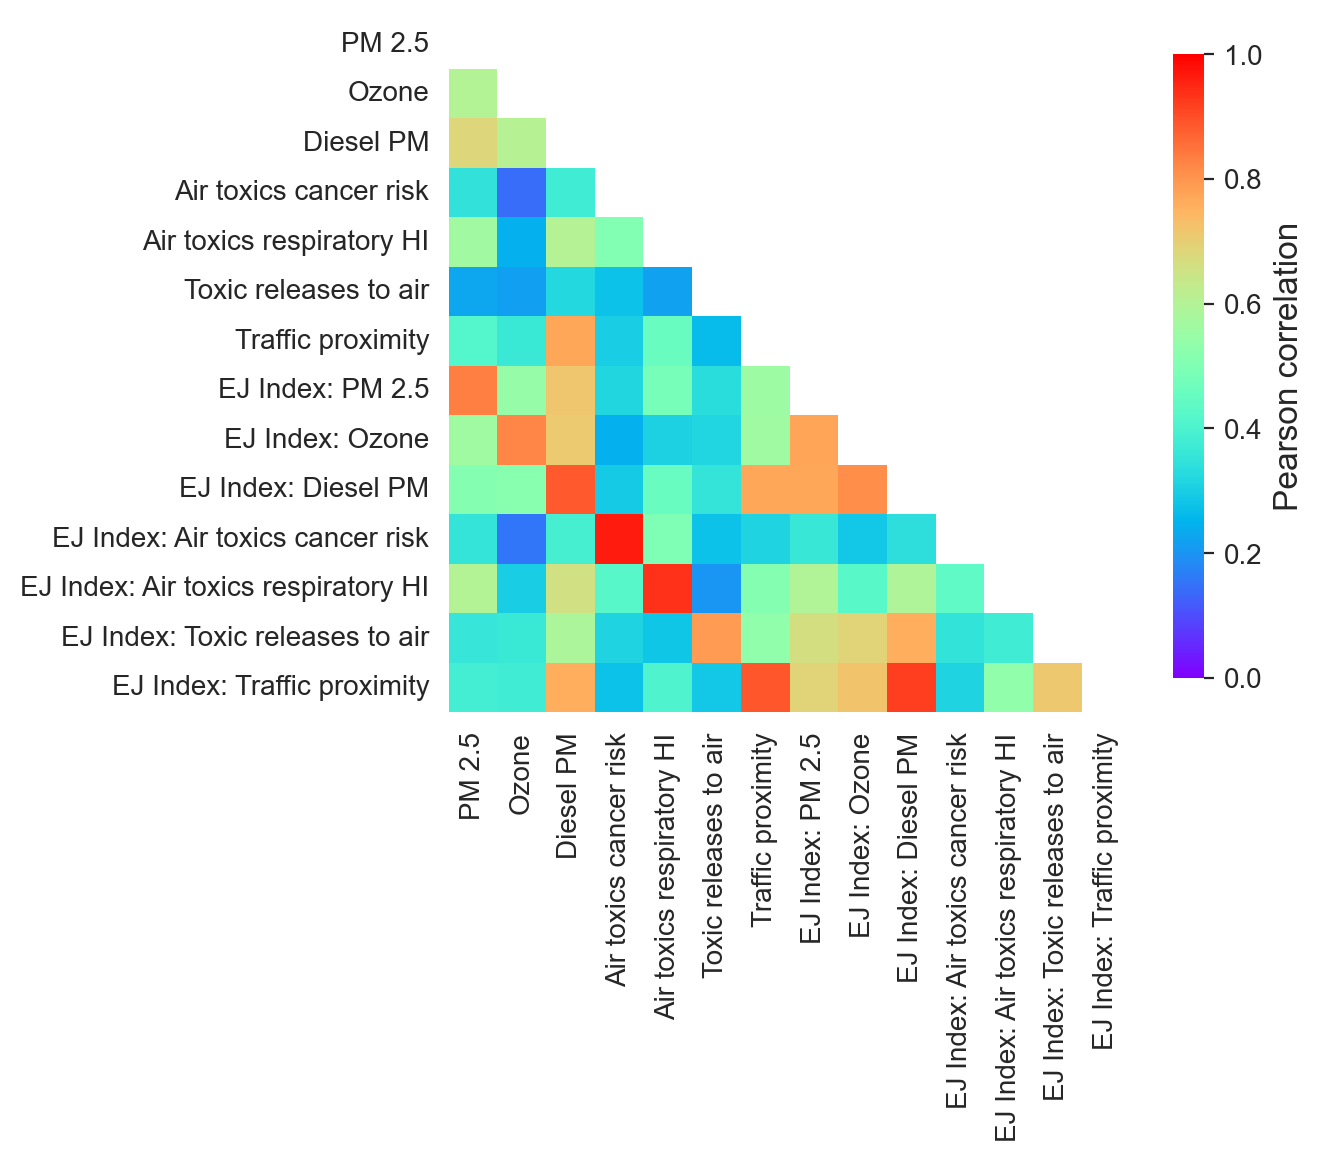

In [ ]:
def plot_corr_ejs(query, df=ejs, vmin=0, vmax=1, lower=True, 
                  cmap='rainbow', size=(5.5, 4.5), dpi=100):
    df = df.query(query).dropna().pivot(
        index='geoid', columns=['is_derived', 'variable'],
        values='value').droplevel(0, axis=1).corr()
    corr = np.tril(df.values, -1)
    corr[corr == 0] = np.nan
    ax = U.plot(size=size, dpi=dpi, gridcolor='w')
    df = Pdf(corr, index=df.index, columns=df.columns)
    ax = sns.heatmap(df, ax=ax, cmap=cmap, vmin=vmin, vmax=vmax,
                     cbar_kws=dict(label='Pearson correlation', shrink=0.9))
    ax.set_xlabel('')
    ax.set_ylabel('')

plot_corr_ejs('scale=="Tract" & ~is_ses & is_pctile', dpi=200)

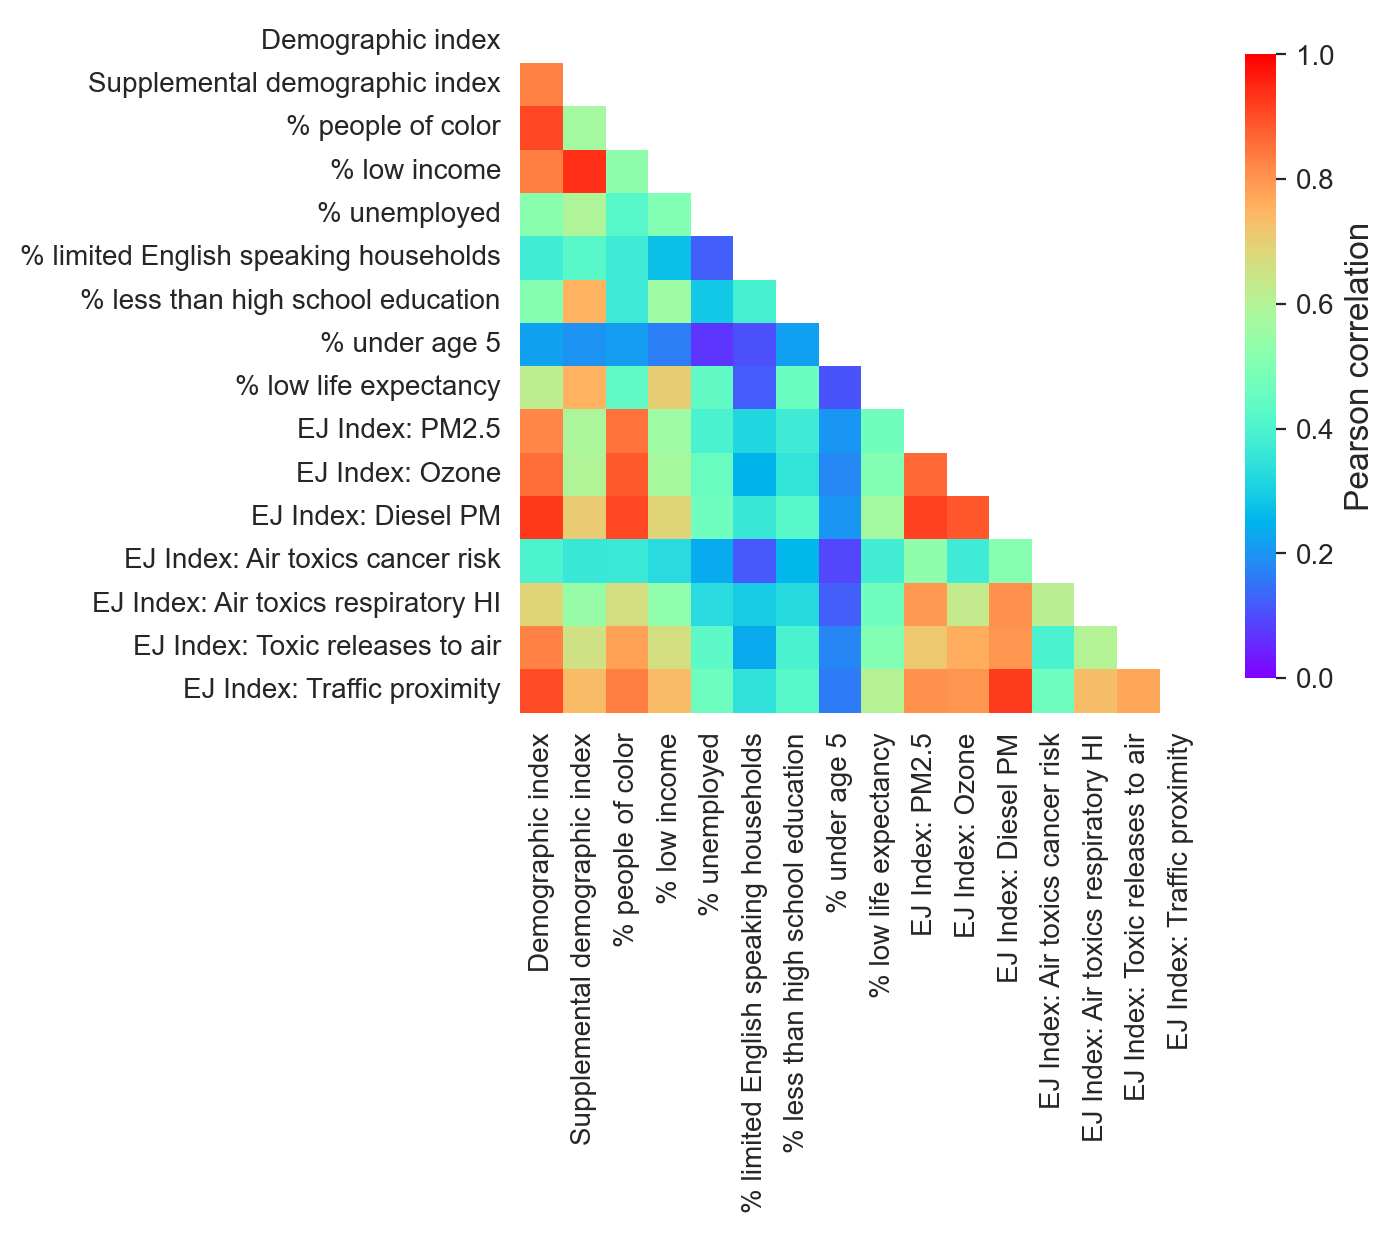

In [ ]:
plot_corr_ejs('scale=="Tract" & is_derived & ~is_pctile', dpi=200)

<Axes: >

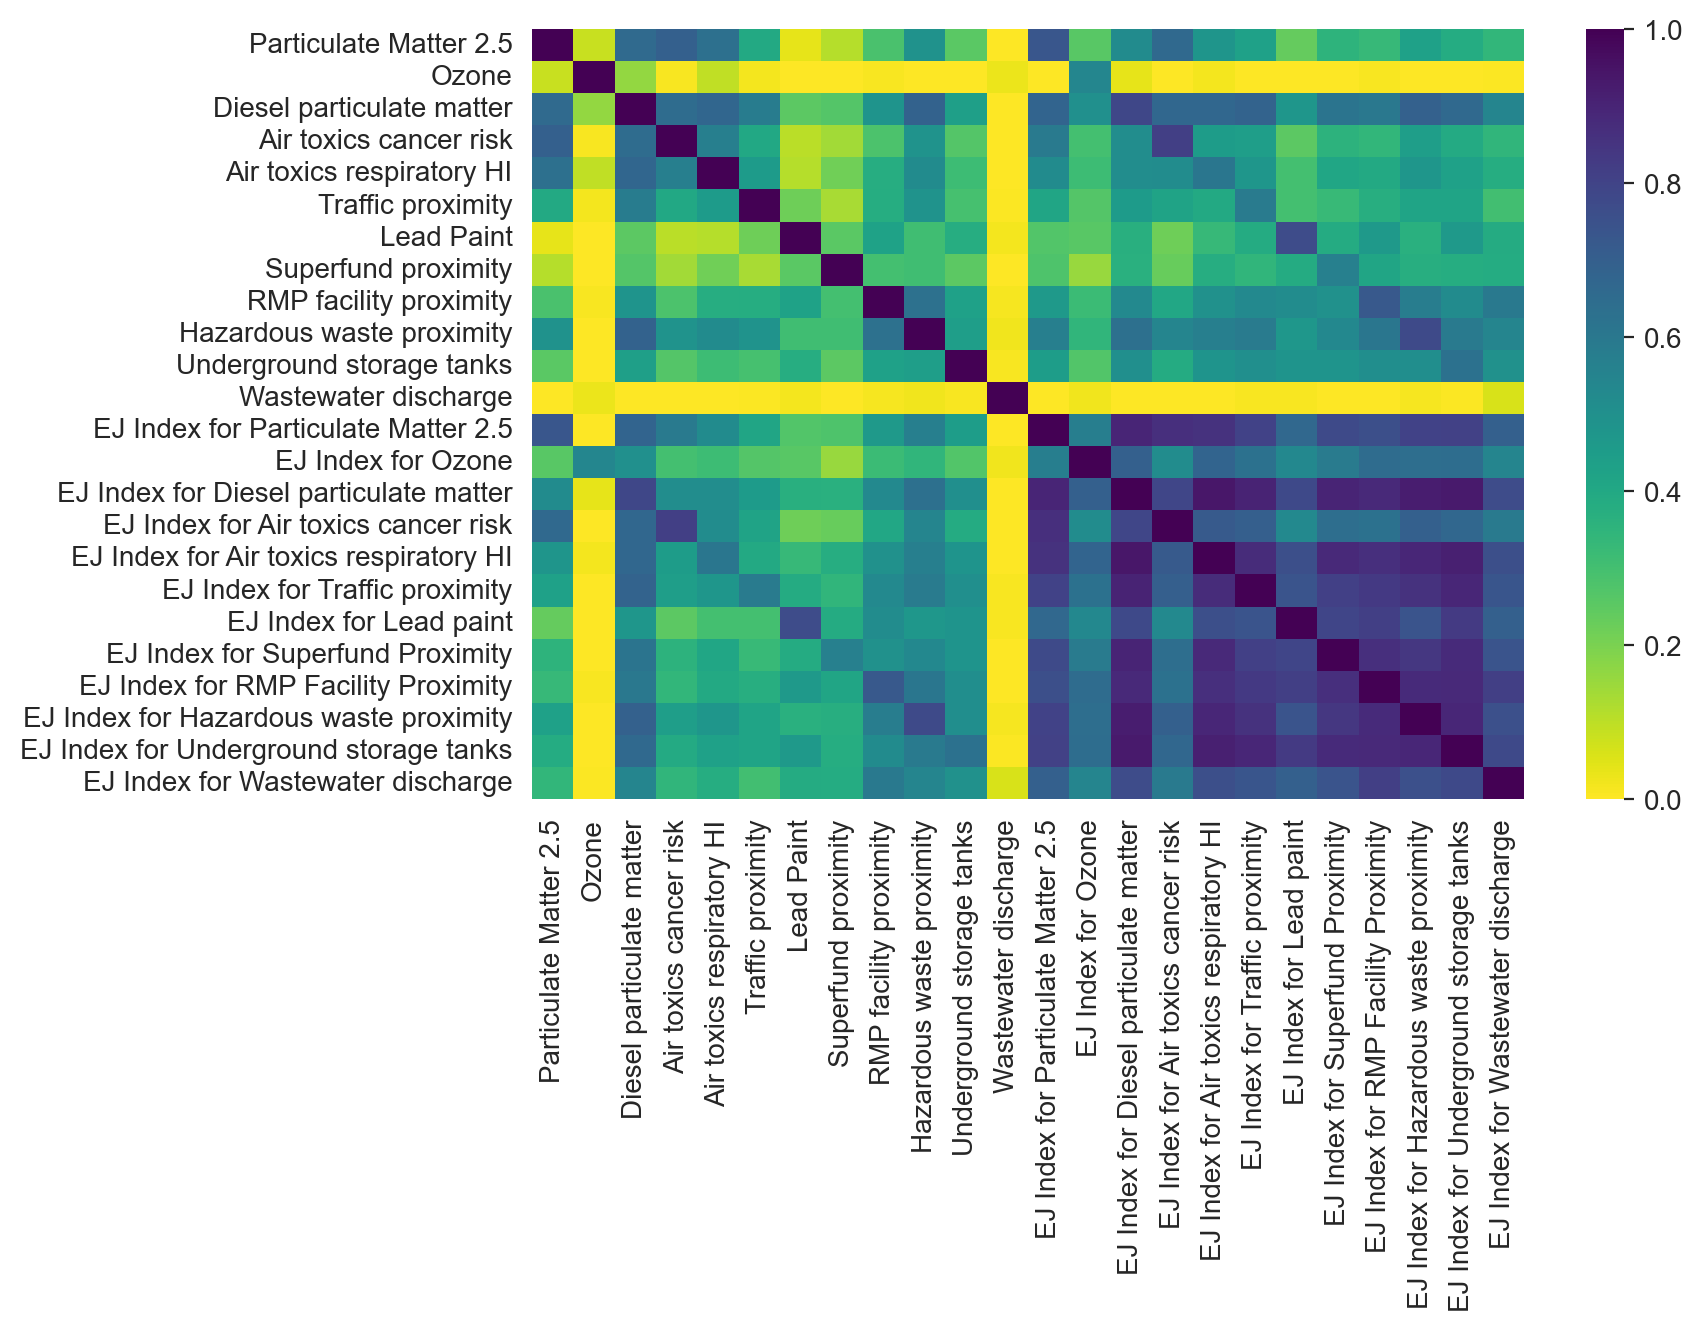

In [ ]:
def plot_corr_ejs(query, exclude_vars=[], df=ejs, vmin=0, vmax=1, 
                  cmap='viridis_r', size=(8, 5), dpi=100):
    if isinstance(query, dict):
        query = ' & '.join([f'{k} == "{v}"' for k, v in query.items()])
    df = df.query(query).pipe(lambda df: df[~df['variable'].isin(exclude_vars)]).dropna()
    df = df.pivot(index='geoid', columns=['base_or_derived', 'variable'], values='value')
    df = df.droplevel(0, axis=1)
    ax = U.plot(size=size, dpi=dpi)
    ax = sns.heatmap(df.corr(), ax=ax, cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_xlabel(''); ax.set_ylabel('')
    return ax

exclude_vars = ['Number of EJ Indexes exceeeding 80 percentile']
x = plot_corr_ejs(dict(scale='Tract', ej_or_ses='EJ', value_or_pctile='Value'), exclude_vars, dpi=200); x

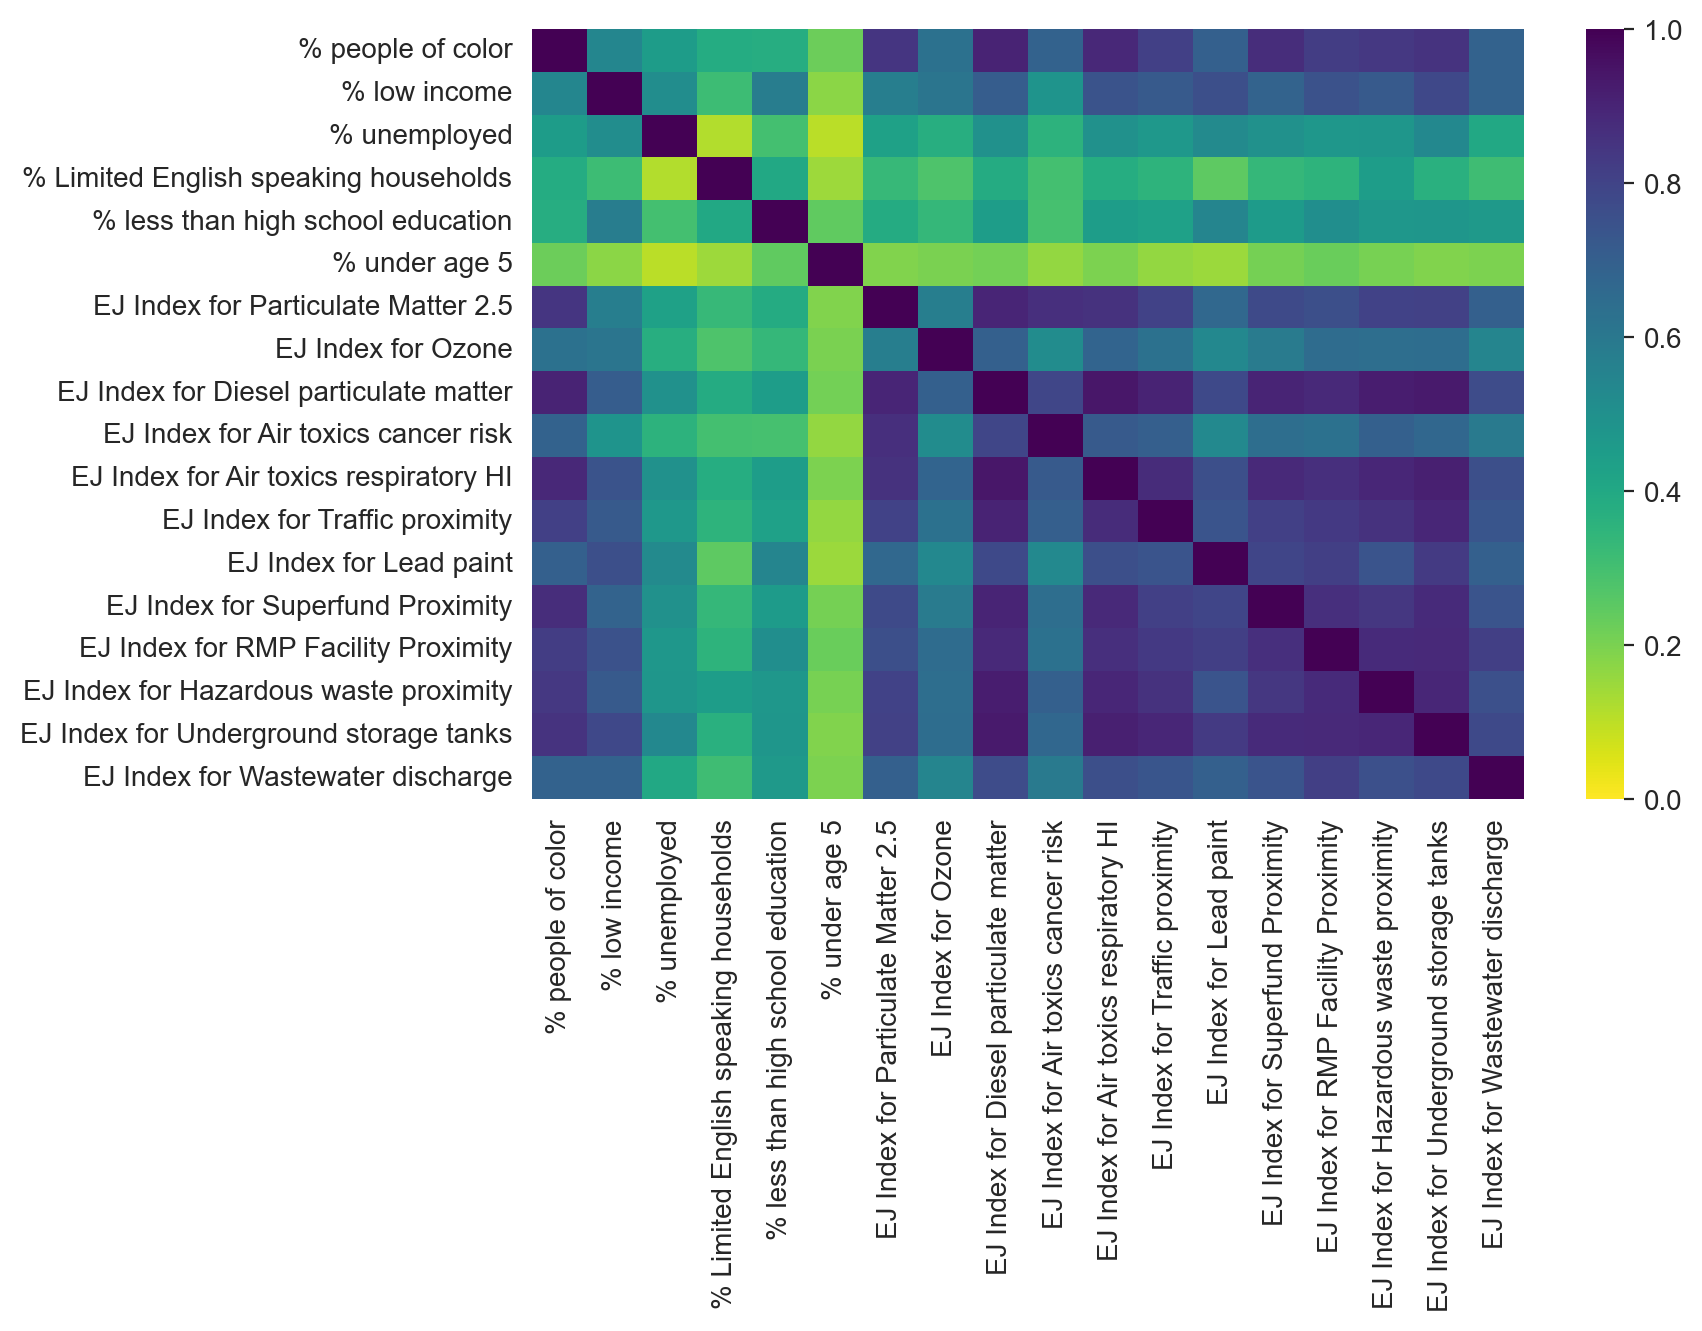

In [ ]:
x = plot_corr_ejs(dict(scale='Tract', base_or_derived='Derived', value_or_pctile='Value'), 
                  exclude_vars, dpi=200)

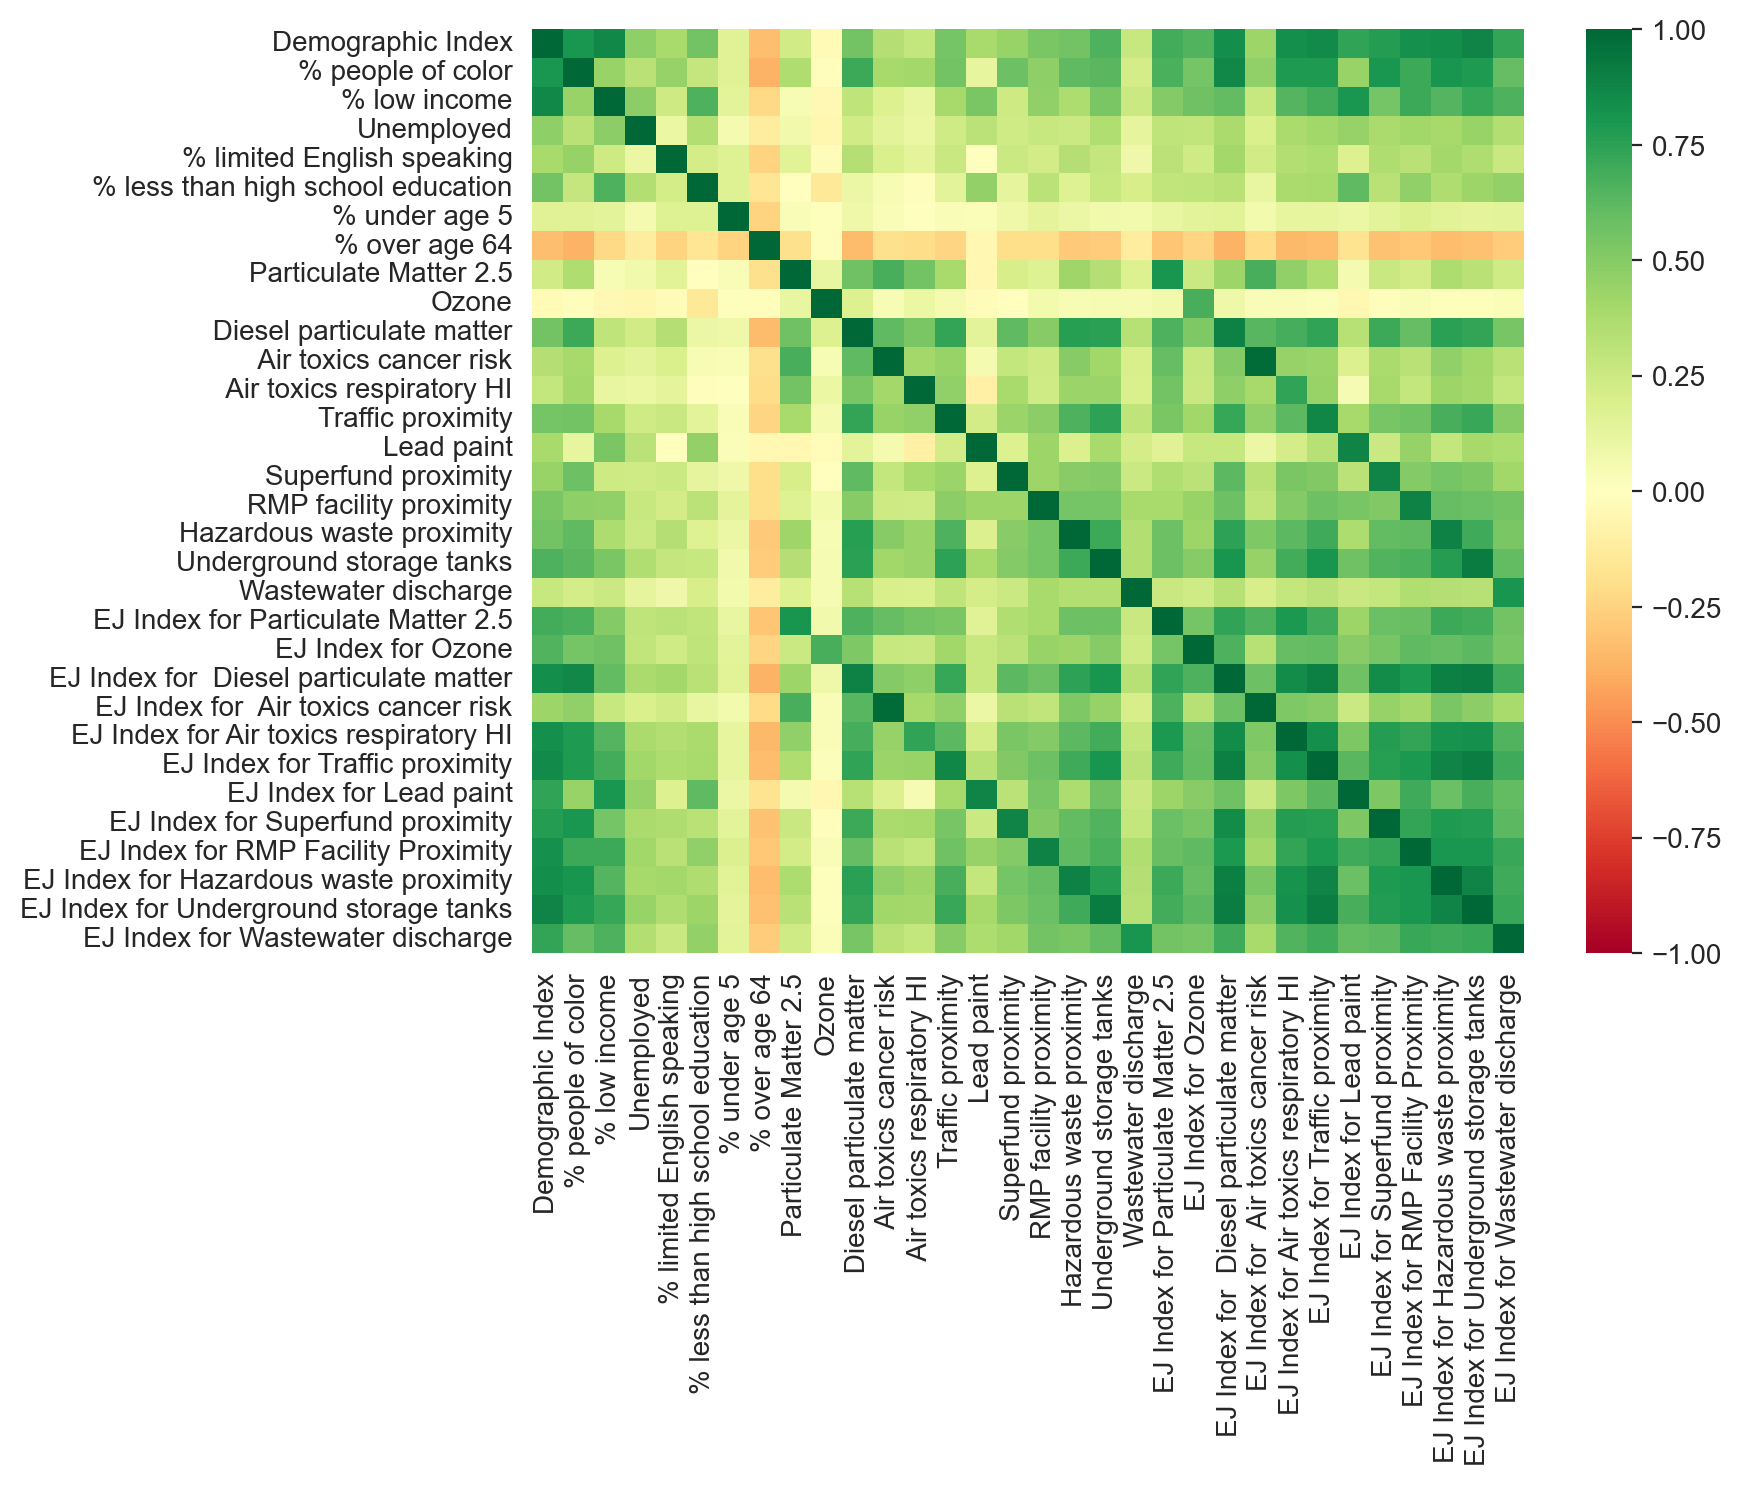

In [ ]:
x = plot_corr_ejs(dict(scale='Tract', value_or_pctile='Percentile'), 
                  exclude_vars, vmin=-1, cmap='RdYlGn', dpi=200, size=(8, 6))

## 3.2. Plot maps

In [ ]:
indy_counties = ['Boone','Brown','Hamilton','Hancock','Hendricks','Johnson','Madison','Marion','Morgan','Putnam','Shelby']

In [ ]:
bgs = (zones.query('scale=="BG"').assign(county_fips=lambda df: df['geoid'].str.slice(0, 5))
       .merge(bound.merge(Pdf({'name': indy_counties}))['geoid'].rename('county_fips'))
       .set_crs(CRS_DEG)).disp()

1,178 rows x 7 cols; Memory: 0.9 MiB; CRS: EPSG:4326


,geoid,aland,awater,geometry,scale,name,county_fips
,<category>,<int64>,<int64>,<geometry>,<object>,<object>,<object>
0,180816112003,50259791,412098,"POLYGON ((-86.02792 39.37482, -86.027911 39.37...",BG,None,18081


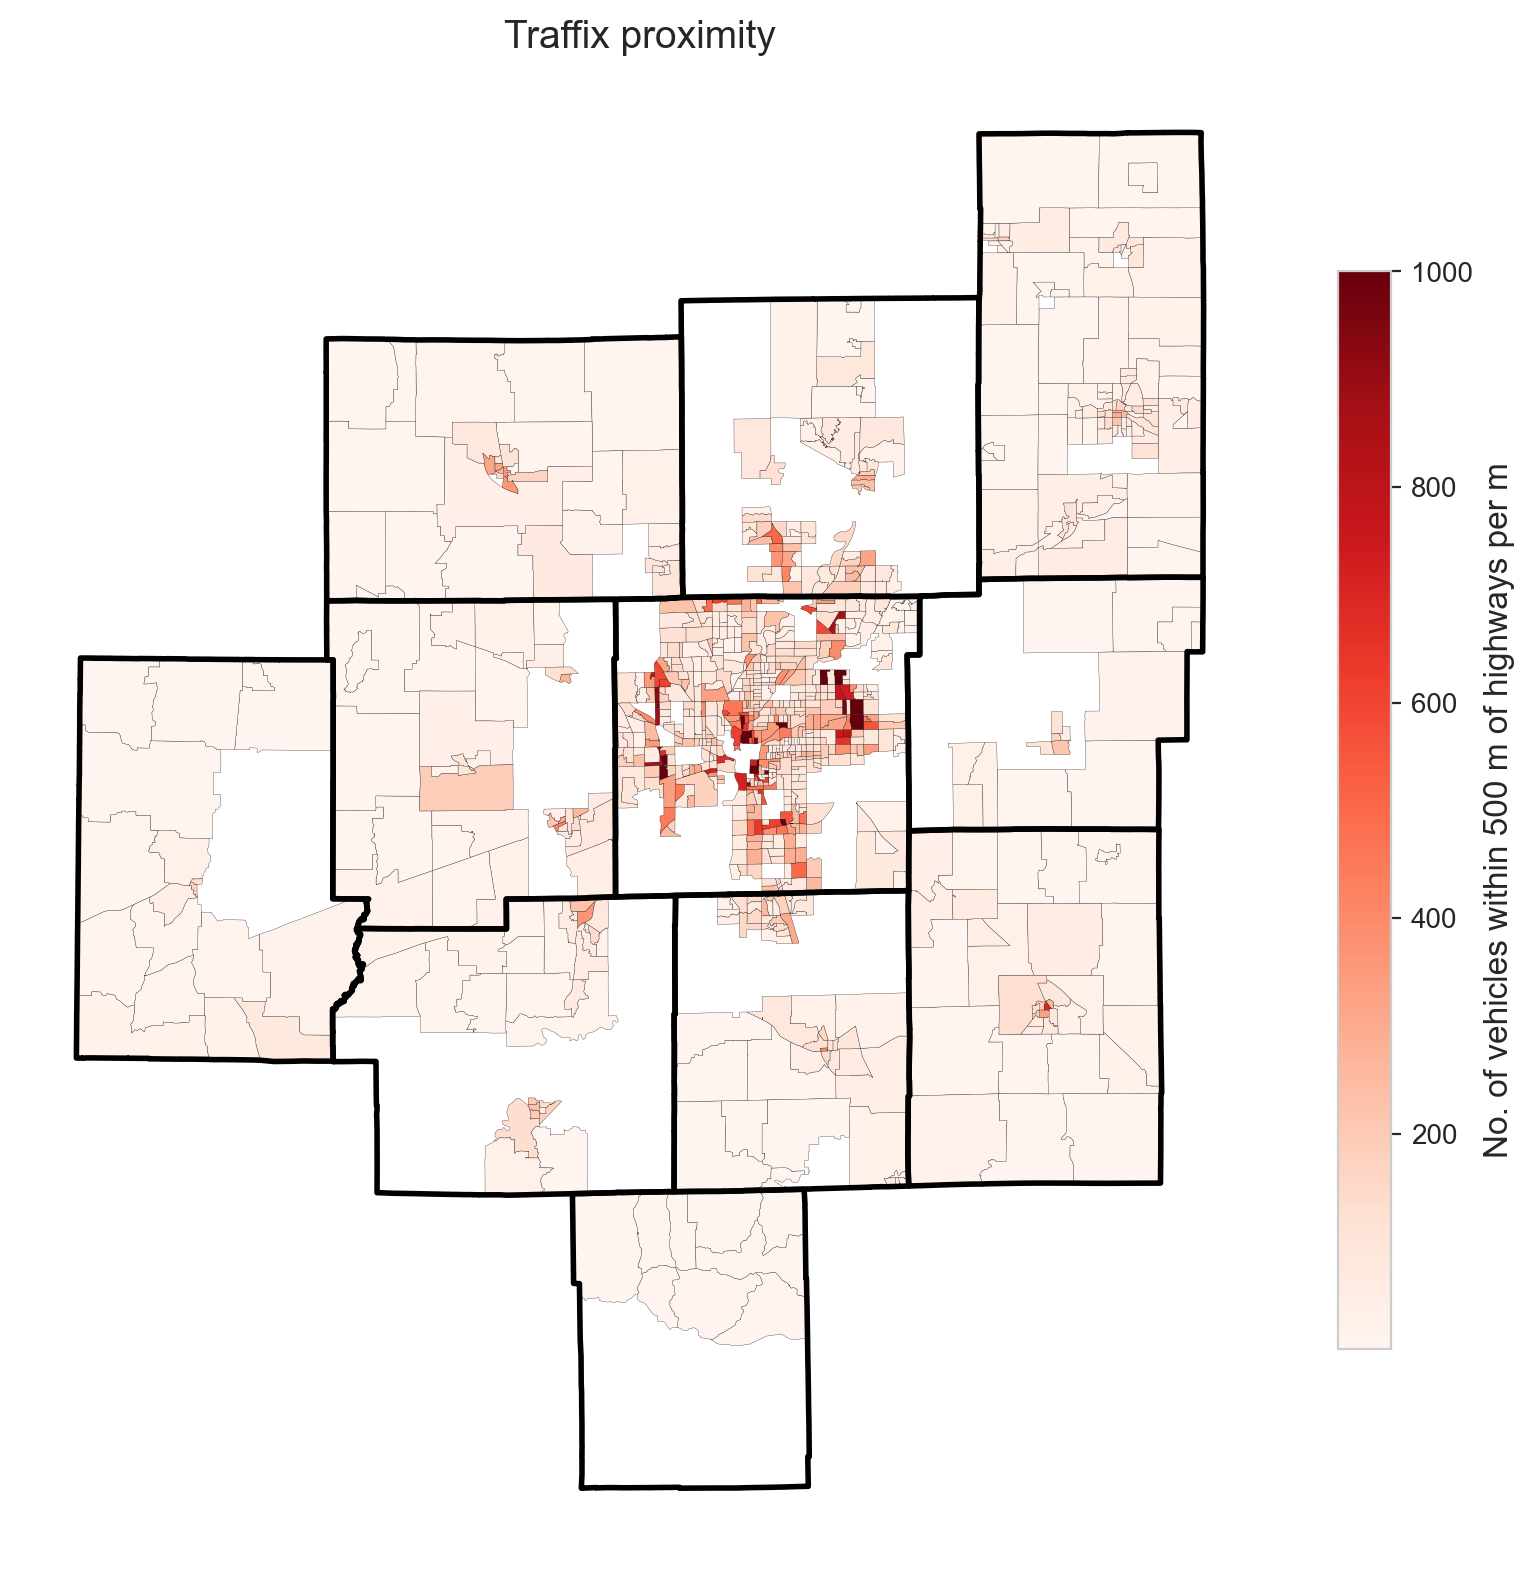

In [ ]:
ax = U.plot(size=(10, 10), dpi=200, axoff=1, title='Traffix proximity')
(bgs.to_crs(CRS_M).merge(ejs.query(
    'scale=="BG" & variable=="Traffic proximity" & ~is_pctile'))
 .plot(ax=ax, column='value', cmap='Reds', linewidth=0.1,
       edgecolor='k', vmax=1000, legend=True, legend_kwds=dict(
           shrink=0.7, label='No. of vehicles within 500 m of highways per m')))
(bound.merge(Pdf({'name': indy_counties})).to_crs(CRS_M)
 .plot(ax=ax, edgecolor='k', facecolor='none', linewidth=2));

In [ ]:
ses = (ejs.query('ej_or_ses=="SES" & value_or_pctile=="Percentile"')
       .pivot('geoid', 'variable', 'value').astype(int))
ses.columns = ['demographic_index', 'pct_people_of_color', 'pct_low_income', 'pct_unemployed', 
               'pct_limited_english', 'pct_low_education', 'pct_infants', 'pct_seniors']
ses = bound[['geoid', 'scale', 'name', 'geometry']].merge(ses, on='geoid').disp(3)

5,350 rows x 12 cols; Memory: 1.2 MiB; CRS: EPSG:4326


/tmp/ipykernel_192682/3358841739.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ses = (ejs.query('ej_or_ses=="SES" & value_or_pctile=="Percentile"')


,geoid,scale,name,geometry,demographic_index,pct_people_of_color,pct_low_income,pct_unemployed,pct_limited_english,pct_low_education,pct_infants,pct_seniors
,<object>,<object>,<object>,<geometry>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>,<int64>
0,181379685003,BG,None,"POLYGON ((-85.20815 39.304011, -85.208134 39.3...",54,22,71,39,0,23,98,61
1,181379685002,BG,None,"POLYGON ((-85.236724 39.298839, -85.236543 39....",38,34,48,68,88,27,63,44
2,181379685001,BG,None,"POLYGON ((-85.218627 39.296581, -85.219221 39....",73,60,82,96,0,58,88,54


In [ ]:
def plot_map_color(df, scale, query, value_var, title, bound=bound,
                   cmap='BuPu', size=(8, 14), dpi=120):
    try:
        zones = bound.query(f'scale == "{scale}"')
        df = (df[df['scale'] == scale].query(query)
              .sort_values(value_var).reset_index(drop=True))
        df['pctile'] = (df.index + 1) / len(df) * 100
        df = zones.merge(df, on='geoid')[['geoid', 'geometry', 'pctile']]
        ax = U.plot(size=size, dpi=dpi, axoff=1)
        ax.set_title(f'{title} @ {scale}', fontsize=24)
        df.plot(ax=ax, column='pctile', cmap=cmap, legend=True, 
                legend_kwds=dict(shrink=0.5, label='Percentile value'),
                lw=0.2, edgecolor='grey')
        cnty = bound.query('scale == "County"')
        cnty.plot(ax=ax, facecolor='none', edgecolor='k', lw=1)
        P.imsave(root=P.root / 'fig/ses')
    except Exception as e:
        print(scale, query, '->', e)
    finally:
        plt.close()

In [ ]:
for val in ['High (>$3,333/mo)', 'Low (<$1,250/mo)', 'Medium ($1,250–$3,333/mo)']:
    query = ' & '.join([
        'mode=="Transit"',
        'tt_thresh==30',
        'is_rac',
        'category=="Job earnings"',
        f'subcategory=="{val}"'
    ])
    plot_map_color(aaa, 'Tract', query, 'num_jobs', 'Num jobs by job earnings - ' + val, cmap='OrRd')

In [ ]:
d1 = aaa.query("scale=='Tract' & mode=='Transit' & is_rac & tt_thresh==30 & category=='Job earnings' & subcategory=='Low (<$1,250/mo)'")[['geoid','num_jobs']]
d2 = ejs.query('scale=="Tract" & ej_or_ses=="SES" & value_or_pctile=="Value" & base_or_derived=="Derived" & variable=="% people of color"')[['geoid','value']]
df = d2.merge(d1, on='geoid').disp()

1,318 rows x 3 cols; Memory: 0.1 MiB


,geoid,value,num_jobs
,<object>,<float64>,<int32>
0,18001030100,0.064724,8825


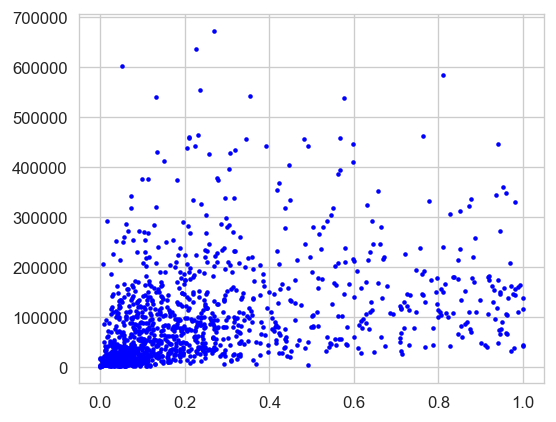

In [ ]:
ax = U.plot(size=(5,4), dpi=120, xlab='')
ax.scatter(df.value, df.num_jobs, s=3, c='b')